In [1]:
import numpy as np
from performance.parameters import mean_true_time, read_timing_pars
from performance.performance_plots import charge_resolution, time_resolution

from ctapipe.io import EventSource
from ctapipe.calib import CameraCalibrator


In [2]:
directory = "/home/nieves/Notebooks/ctapipe_analysis/Data"  
simtel_url = directory + "/gamma_20deg_0deg_run1555___cta-prod6-paranal-2147m-Paranal-dark-bs5.0-10k-lfa64.simtel.zst"



In [3]:
true_image = []
image = []
peak_time = []
true_time = []


with EventSource(simtel_url) as source:

    subarray = source.subarray
    calibrator = CameraCalibrator(source.subarray, image_extractor_type = "FlashCamExtractor")

    for event in source:
        calibrator(event)
        for tel_id in subarray.get_tel_ids_for_type("MST_MST_FlashCam"): 
            
            true_pe = event.simulation.tel[tel_id].true_image            
            
            if true_pe is None:
                continue

            waveforms = event.r1.tel[tel_id].waveform
            broken_pixels = event.mon.tel[tel_id].pixel_status.hardware_failing_pixels[0]
            dl1 = event.dl1.tel[tel_id]
            true_t, true_std = mean_true_time(source, tel_id)

            true_image.append(true_pe)
            image.append(dl1.image)
            peak_time.append(dl1.peak_time)
            true_time.append(true_t)
            


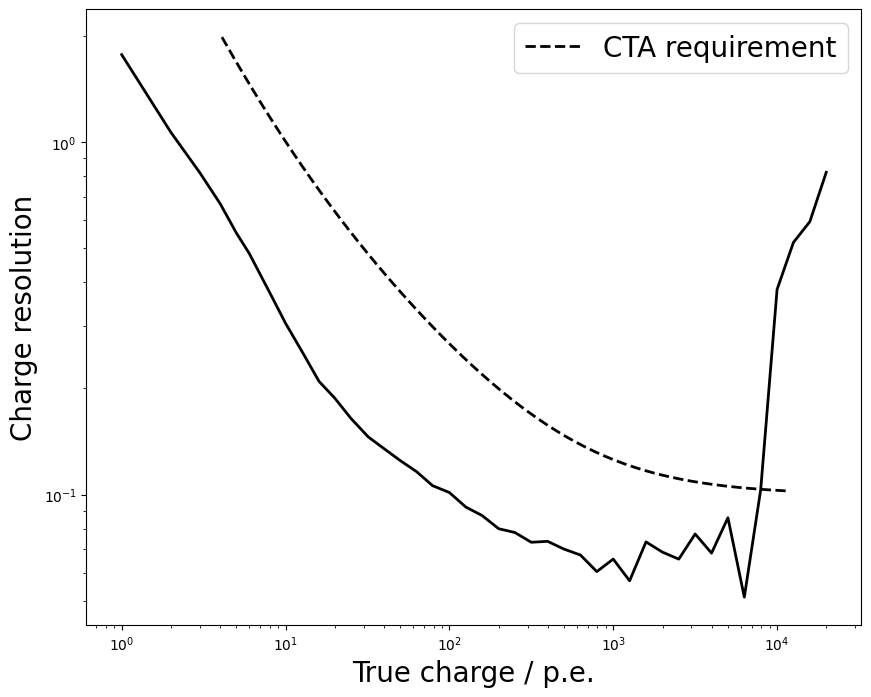

/home/nieves/github/performance/src/performance/performance_plots.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p_mean, p_std, p_n, p_x_edges = profile(np.log10(true_charge), (true_time - reconstructed_time)**2, bins=bins, sigma_cut=3)


ValueError: operands could not be broadcast together with shapes (2882,) (177451,) 

<Figure size 1000x800 with 0 Axes>

In [4]:
charge_resolution(0, 5, 50, np.array(true_image)[np.array(true_image)>0], np.array(image)[np.array(true_image)>0])
time_resolution(50, np.array(true_image)[np.array(true_image)>0], true_time, np.array(peak_time)[np.array(true_image)>0])

